In [43]:
%matplotlib inline

from matplotlib import pyplot as plt
from crn_utils import SimulationOptions, run_simulation
import numpy as np

simulation_options = SimulationOptions()

In [57]:
simulation_options.set_repeats(100)
simulation_options.set_max_time(2000)
simulation_options.set_volumes([int(volume) for volume in np.logspace(2.0, 4.0, 20)])
simulation_options.net_from_file("./nets/tri-molecular.json")

data_tri = run_simulation(simulation_options)
places = data_tri.columns.difference(["repeatNum", "time", "volume"])

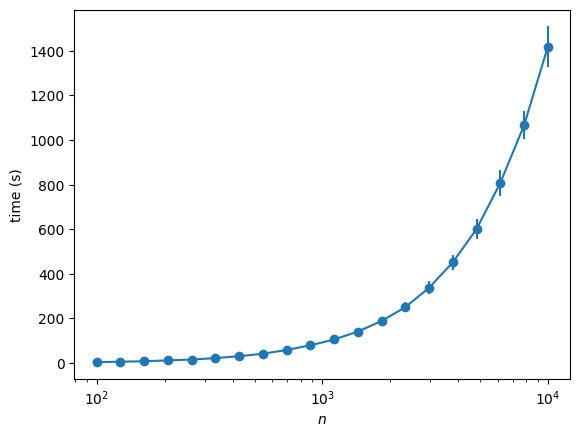

In [58]:
t_end_av = []
t_end_err = []
n_vals = []

for n in data_tri["volume"].unique():
    t_end = []
    for repeat in data_tri["repeatNum"].unique():
        t_end.append(data_tri[data_tri["volume"].eq(n) & data_tri["repeatNum"].eq(repeat)]["time"].max())
    t_end_av.append(np.mean(t_end))
    t_end_err.append(np.std(t_end))
    n_vals.append(n)

plt.xscale("log")
plt.xlabel("$n$")
plt.ylabel("time (s)")
plt.scatter(n_vals, t_end_av)
plt.errorbar(n_vals, t_end_av, t_end_err)
plt.show()

In [41]:
simulation_options.net_from_file("./nets/double-b.json")
simulation_options.set_repeats(20)

data_double_b = run_simulation(simulation_options)
places = data_double_b.columns.difference(["repeatNum", "time", "volume"])

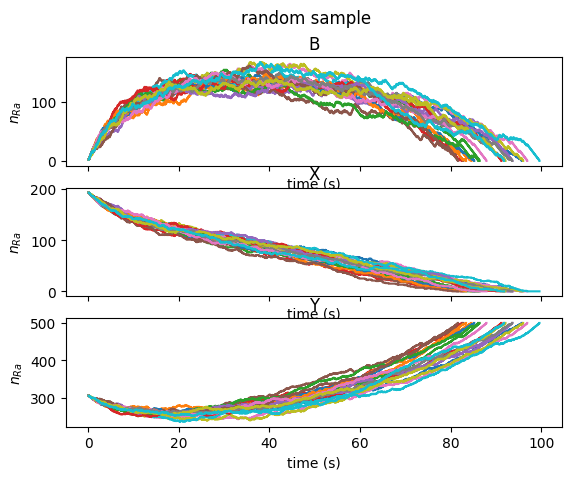

In [42]:
DATA500 = data_double_b[data_double_b["volume"] == 500]

fig, axs = plt.subplots(len(places), sharex=True)
fig.suptitle("random sample")

row = 0
for place in places:
    for repeat in DATA500["repeatNum"].unique():
        axs[row].step(DATA500[DATA500["repeatNum"] == repeat]["time"], DATA500[DATA500["repeatNum"] == repeat][place], where='post', label="{}-{}".format(place, repeat))
        axs[row].set_xlabel("time (s)")
        axs[row].set_ylabel("$n_{Ra}$")
        axs[row].set_title(place)
    row += 1
